# Clustering ATMs

In this notebook, I will pick n atm ids (n=50) and generate a dataset for clustering.

In [30]:
import matplotlib.pyplot as plt

sys.path.append(r'../atm_demand')
from feature_generation import *
from models import *

import pandas as pd
import tensorflow as tf
from scipy.special import softmax
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [31]:
df = pd.read_csv("../atm_demand/DATA_sample_atm.csv")

In [32]:
df['AtmId'].value_counts()[:50].index

Int64Index([ 26637,  27687,  27663,  33817,  33821,  27651,  32785,  33793,
             33795,  33796, 119852,  33800,  27664,  27667,  33807,  33850,
             33774,  33852,  27711,  33827,  33828,  33830,  27707,  33831,
             33833,  27727,  27723,  33879,  27714,  33862,  33809,  33771,
             27729,  27570,  27537,  33677,  27539,  33679,  33713,  33714,
             27556,  33724,  33726,  27579,  33707,  27568,  33711, 119801,
             33766,  33750],
           dtype='int64')

## Generating Datasets with Data of All ATMs

In [33]:
CLUSTER_WITH = 'CashIn'

clustering_df = pd.DataFrame(dtype='float64')
feature_sets = []
atmIds = df['AtmId'].value_counts()[:20].index


for atmId in atmIds:
    atm_df = get_atm(df, atmId)
    atm_df = atm_df[:-135]
    atm_df = clean_data(atm_df, drop_zeros=True)
    
    #for target in ['CashIn', 'CashOut']:
    #    atm_df[target] = np.log(atm_df[target] + 1e-6)

    day_of_the_week_index = get_day_of_the_week_index(atm_df.index)

    for i in range(7):
        clustering_df.loc[atmId, i] = atm_df.loc[day_of_the_week_index[day_of_the_week_index == i].index].mean()[CLUSTER_WITH]

    atm_df['AtmId'] = atmId
    feature_set = get_feature_sets(atm_df, ['CashIn', 'CashOut'])
    feature_sets.append(feature_set)

all_atms_feature_set = pd.concat(feature_sets, axis=0)

## Applying Kmeans and Updating the Dataset

In [34]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(softmax(np.log(clustering_df.to_numpy()), axis=1))

d = {atmId:label for atmId, label in zip(atmIds, kmeans.labels_)}

all_atms_feature_set['ClusterId'] = all_atms_feature_set['AtmId'].map(d)
all_atms_feature_set.sort_index(inplace = True)
all_atms_feature_set

,CashIn,CashOut,AtmId,CashIn_average_7,CashIn_average_30,CashOut_average_7,CashOut_average_30,CashIn_trend_7,CashOut_trend_7,CashIn_t-1,...,ramazan_in_7_days,is_kurban,kurban_in_7_days,is_cocuk_bayrami,is_isci_bayrami,is_spor_bayrami,is_zafer_bayrami,is_cumhuriyet_bayrami,Special_Dates_Index,ClusterId
HistoryDate,,,,,,,,,,,,,,,,,,,,,
2016-02-10,55320.0,36480.0,26637,56012.857143,55019.000000,49010.000000,42199.333333,119250.0,60210.0,46460.0,...,0,0,0,0,0,0,0,0,0,3
2016-02-10,8680.0,5730.0,33817,7741.428571,7057.000000,5151.428571,5711.666667,22330.0,2910.0,6350.0,...,0,0,0,0,0,0,0,0,0,2
2016-02-10,15000.0,53750.0,33821,24338.571429,21724.666667,39934.285714,28915.000000,38150.0,27240.0,21910.0,...,0,0,0,0,0,0,0,0,0,2
2016-02-10,6240.0,5520.0,32785,11815.714286,7919.666667,6397.142857,5221.000000,9100.0,2390.0,10040.0,...,0,0,0,0,0,0,0,0,0,1
2016-02-10,24910.0,51960.0,33793,27709.285714,32496.500000,32752.142857,25472.166667,-16200.0,29430.0,58360.0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-22,53830.0,42100.0,33800,24810.714286,46349.000000,17891.428571,48140.666667,61490.0,71210.0,49435.0,...,0,0,0,0,0,0,0,0,0,6
2020-01-22,39590.0,42090.0,33821,54565.714286,49382.500000,63811.428571,67698.333333,41060.0,131110.0,71050.0,...,0,0,0,0,0,0,0,0,0,2
2020-01-22,79940.0,87130.0,27664,107042.142857,93602.166667,93000.000000,85325.333333,209685.0,162800.0,60895.0,...,0,0,0,0,0,0,0,0,0,1


## Aranging Data for Model Training

In [35]:
all_atms_feature_set.columns

Index(['CashIn', 'CashOut', 'AtmId', 'CashIn_average_7', 'CashIn_average_30',
       'CashOut_average_7', 'CashOut_average_30', 'CashIn_trend_7',
       'CashOut_trend_7', 'CashIn_t-1', 'CashIn_t-2', 'CashIn_t-3',
       'CashIn_t-4', 'CashIn_t-5', 'CashIn_t-6', 'CashIn_t-7', 'CashIn_t-8',
       'CashIn_t-9', 'CashIn_t-10', 'CashIn_t-11', 'CashIn_t-12',
       'CashIn_t-13', 'CashIn_t-14', 'CashOut_t-1', 'CashOut_t-2',
       'CashOut_t-3', 'CashOut_t-4', 'CashOut_t-5', 'CashOut_t-6',
       'CashOut_t-7', 'CashOut_t-8', 'CashOut_t-9', 'CashOut_t-10',
       'CashOut_t-11', 'CashOut_t-12', 'CashOut_t-13', 'CashOut_t-14',
       'CashOut_t-15', 'CashOut_t-16', 'CashOut_t-17', 'CashOut_t-18',
       'CashOut_t-19', 'CashOut_t-20', 'CashOut_t-21', 'CashOut_t-22',
       'CashOut_t-23', 'CashOut_t-24', 'CashOut_t-25', 'CashOut_t-26',
       'CashOut_t-27', 'CashOut_t-28', 'CashOut_t-29', 'CashOut_t-30',
       'CashOut_t-31', 'CashOut_t-32', 'CashOut_t-33', 'CashOut_t-34',
       'CashOut

In [36]:
categorical_features = ['Day_of_the_Week_Index', 'Day_of_the_Month_Index',
       'Week_of_the_Year_Index', 'Is_Weekday', 'Special_Dates_Index',
       'is_cocuk_bayrami', 'is_isci_bayrami', 'is_spor_bayrami',
       'is_zafer_bayrami', 'is_cumhuriyet_bayrami', 'ClusterId']
continuous_features   = ['CashIn_average_7', 'CashIn_average_30',
       'CashOut_average_7', 'CashOut_average_30', 'CashIn_trend_7',
       'CashOut_trend_7', 'CashIn_t-1', 'CashIn_t-2', 'CashIn_t-3',
       'CashIn_t-4', 'CashIn_t-5', 'CashIn_t-6', 'CashIn_t-7', 'CashIn_t-8',
       'CashIn_t-9', 'CashIn_t-10', 'CashIn_t-11', 'CashIn_t-12',
       'CashIn_t-13', 'CashIn_t-14', 'CashOut_t-1', 'CashOut_t-2',
       'CashOut_t-3', 'CashOut_t-4', 'CashOut_t-5', 'CashOut_t-6',
       'CashOut_t-7', 'CashOut_t-8', 'CashOut_t-9', 'CashOut_t-10',
       'CashOut_t-11', 'CashOut_t-12', 'CashOut_t-13', 'CashOut_t-14',
       'CashOut_t-15', 'CashOut_t-16', 'CashOut_t-17', 'CashOut_t-18',
       'CashOut_t-19', 'CashOut_t-20', 'CashOut_t-21', 'CashOut_t-22',
       'CashOut_t-23', 'CashOut_t-24', 'CashOut_t-25', 'CashOut_t-26',
       'CashOut_t-27', 'CashOut_t-28', 'CashOut_t-29', 'CashOut_t-30',
       'CashOut_t-31', 'CashOut_t-32', 'CashOut_t-33', 'CashOut_t-34',
       'CashOut_t-35', 'CashOut_t-36', 'CashOut_t-37', 'CashOut_t-38',
       'CashOut_t-39', 'CashOut_t-40']

groups = [continuous_features]
groups.extend(categorical_features)

TARGET = 'CashIn'
X_train, X_test, y_train, y_test = train_test_split(all_atms_feature_set[all_atms_feature_set.columns[2:]], all_atms_feature_set[TARGET], shuffle = False)

train_inputs = get_input_sets(X_train, groups)
test_inputs  = get_input_sets(X_test, groups)

## Training

In [37]:
tabTransformer = TabTransformer(
    categories = [len(all_atms_feature_set[categorical].unique()) for categorical in categorical_features],
    num_continuous = len(continuous_features),
    dim = 16,
    dim_out = 1,
    depth = 6,
    heads = 12,
    attn_dropout = 0.1,
    ff_dropout = 0.1,
    mlp_hidden = [(64, 'relu'), (16, 'relu')]
)

In [38]:
tabTransformer.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mse',
    metrics='mape')

In [39]:
history = tabTransformer.fit(train_inputs, 
            y_train,
            batch_size=1024,
            epochs=20,
            validation_data=(test_inputs, y_test),
            verbose = 1)

Epoch 1/20
22/22 [==============================] - 33s 1s/step - loss: 1202289276204.5217 - mape: 1654.2872 - val_loss: 649031744.0000 - val_mape: 77.4267
Epoch 2/20
22/22 [==============================] - 24s 1s/step - loss: 642751727.3043 - mape: 217.4216 - val_loss: 735800192.0000 - val_mape: 90.2364
Epoch 3/20
22/22 [==============================] - 28s 1s/step - loss: 512744417.3913 - mape: 148.5041 - val_loss: 604932864.0000 - val_mape: 81.1215
Epoch 4/20
22/22 [==============================] - 28s 1s/step - loss: 468370259.4783 - mape: 135.2742 - val_loss: 467155040.0000 - val_mape: 61.7415
Epoch 5/20
22/22 [==============================] - 29s 1s/step - loss: 422195650.7826 - mape: 130.5330 - val_loss: 503590880.0000 - val_mape: 55.0925
Epoch 6/20
22/22 [==============================] - 29s 1s/step - loss: 413799172.1739 - mape: 143.2067 - val_loss: 523721792.0000 - val_mape: 53.8239
Epoch 7/20
22/22 [==============================] - 29s 1s/step - loss: 411066528.0000 - 

In [49]:
def plot_history(history):
    plt.figure(figsize=(10,4))
    for key in history.history:
        if key[-4:] == 'loss':
            continue
        plt.plot(history.history[key][1:], label = key)
    plt.legend()
    plt.show()

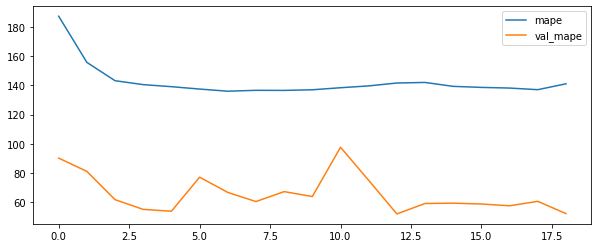

In [50]:
plot_history(history)

In [52]:
"min_loss: %.4f, min_val_loss: %.4f" % (min(history.history['mape']), min(history.history['val_mape']))

'min_loss: 136.0690, min_val_loss: 51.9872'

In [82]:
ATM_ID = 33817
atm_feature_set = all_atms_feature_set[all_atms_feature_set['AtmId'] == ATM_ID]
atm_feature_set

,CashIn,CashOut,AtmId,CashIn_average_7,CashIn_average_30,CashOut_average_7,CashOut_average_30,CashIn_trend_7,CashOut_trend_7,CashIn_t-1,...,ramazan_in_7_days,is_kurban,kurban_in_7_days,is_cocuk_bayrami,is_isci_bayrami,is_spor_bayrami,is_zafer_bayrami,is_cumhuriyet_bayrami,Special_Dates_Index,ClusterId
HistoryDate,,,,,,,,,,,,,,,,,,,,,
2016-02-10,8680.0,5730.0,33817,7741.428571,7057.000000,5151.428571,5711.666667,22330.0,2910.0,6350.0,...,0,0,0,0,0,0,0,0,0,2
2016-02-11,14160.0,2120.0,33817,6941.428571,7110.333333,5287.142857,5654.333333,8640.0,13690.0,8680.0,...,0,0,0,0,0,0,0,0,0,2
2016-02-12,6930.0,6800.0,33817,7895.714286,7460.666667,4342.857143,5198.333333,12810.0,2950.0,14160.0,...,0,0,0,0,0,0,0,0,0,2
2016-02-13,10950.0,5530.0,33817,7557.142857,7511.333333,4925.714286,5338.000000,7310.0,-4590.0,6930.0,...,0,0,0,0,0,0,0,0,0,2
2016-02-14,14560.0,4190.0,33817,8191.428571,7623.000000,5712.857143,5377.666667,3990.0,-4630.0,10950.0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-18,41850.0,21690.0,33817,41338.571429,42918.500000,22877.142857,24353.666667,25300.0,6820.0,20725.0,...,0,0,0,0,0,0,0,0,0,2
2020-01-19,40675.0,12520.0,33817,42711.428571,42560.833333,22977.142857,24644.333333,40715.0,4660.0,41850.0,...,0,0,0,0,0,0,0,0,0,2
2020-01-20,49110.0,30410.0,33817,43675.714286,42583.500000,22818.571429,24112.666667,68515.0,43020.0,40675.0,...,0,0,0,0,0,0,0,0,0,2


In [83]:
from forecasting import get_error_with_freq
from plotting import draw_error_over_time

In [84]:
def draw_model_error(model, X, y_actual, error_freq='w', split_from=None):

    y_pred = pd.Series(model.predict(X).reshape(-1), index=y_actual.index)
    weekly_errors = get_error_with_freq(y_actual, y_pred, error_freq)
    draw_error_over_time(y_actual, y_pred, weekly_errors, split_from)
    print(weekly_errors.mean())

In [85]:
draw_model_error(tabTransformer, get_input_sets(atm_feature_set, groups), atm_feature_set[TARGET], split_from=X_train.index[-1])

213.79319312121376
